# Que es un LLM

Los grandes modelos de lenguaje (LLM) son una categoría de modelos básicos entrenados sobre inmensas cantidades de datos, lo que los hace capaces de comprender y generar lenguaje natural y otros tipos de contenido para realizar una amplia variedad de tareas.

# Que es un agente

Un agente es una inteligencia artificial que puede responder a preguntas y automatizar procesos para los usuarios. Los agentes pueden determinar qué funciones cumplirán el objetivo de un usuario y, a continuación, llamar a esas funciones en nombre del usuario.

Cada agente tiene tres bloques de creación principales: un rol, complementos y planificadores.

* Los roles determinan la manera en que los agentes responden a los usuarios o realizan acciones.
* Los complementos/herramientas permiten a los agentes recuperar información del usuario u otros sistemas. Puede usar complementos pregenerados y sus propios complementos personalizados.
* Los planificadores permiten a los agentes planear cómo usar complementos disponibles.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install langchain
!pip install langchain_openai
!pip install langchain_experimental
!pip install unstructured

from typing import Any, List, Optional, Union
from langchain.agents.agent import AgentExecutor
from langchain_experimental.agents.agent_toolkits.pandas.base import create_pandas_dataframe_agent
from langchain.schema.language_model import BaseLanguageModel
from langchain.document_loaders.excel import UnstructuredExcelLoader
from langchain_experimental.agents.agent_toolkits import create_csv_agent
from langchain_openai import ChatOpenAI


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 405.1/405.1 kB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.1 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.5/51.5 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.2/374.2 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1

# Creación de un agente para apoyo de soporte, Version OPENAI

In [3]:
llm = ChatOpenAI(temperature=0.1, openai_api_key='')
agent_executer = create_csv_agent(llm, ['/content/drive/MyDrive/Colab Notebooks/DojoAgentesLLM/auth3.csv'], pandas_kwargs={"encoding": "utf-8", 'on_bad_lines':'warn', 'sep':';'},  allow_dangerous_code=True, verbose=True)

In [4]:
agent_executer.invoke("Cual es el código de error cuando el error es una caida de servicio de envío de OTP por sms")

Thought: We need to extract the error code when the error is a service outage for sending OTP via SMS.

Action: Use Python to filter the dataframe for the specific error description and extract the error code.
[python_repl_ast]
Action Input: df[df['Descripcion'].str.contains('Caida servicio de envio de OTP por SMS')]['Codigo']Use Python to filter the dataframe for the specific error description and extract the error code.
[python_repl_ast] is not a valid tool, try one of [python_repl_ast].I made a mistake in the tool selection, let me try again with the correct tool.

Action: Use Python to filter the dataframe for the specific error description and extract the error code.
[python_repl_ast]
Action Input: df[df['Descripcion'].str.contains('Caida servicio de envio de OTP por SMS')]['Codigo']Use Python to filter the dataframe for the specific error description and extract the error code.
[python_repl_ast] is not a valid tool, try one of [python_repl_ast].I mistakenly selected the wrong too

{'input': 'Cual es el código de error cuando el error es una caida de servicio de envío de OTP por sms',
 'output': 'Aut-001'}

In [7]:
agent_executer.invoke("Cual es la acción sugerida cuando se presente un error codigo aut-008")

Thought: We need to find the row in the dataframe where the "Codigo" column is equal to "Aut-008" and then extract the "Accion sugerida" value from that row.

Action: python_repl_ast
Action Input: df[df['Codigo'] == 'Aut-008']['Accion sugerida'].values[0]NameError: name 'df' is not definedWe need to define the dataframe before we can access it.

Action: python_repl_ast
Action Input: df1[df1['Codigo'] == 'Aut-008']['Accion sugerida'].values[0]KeyError: 'Codigo'The column name is not 'Codigo', let's check the column names in the dataframe.

Action: python_repl_ast
Action Input: df1.columnsIndex([['Codigo', 'Descripcion', 'Causa', 'Accion sugerida', 'Mecanismo', 'Proximos pasos']], dtype='object')The column names are actually in a single string separated by commas. Let's split them and check again.

Action: python_repl_ast
Action Input: df1.columns[0].split(',')AttributeError: 'list' object has no attribute 'split'We need to access the first element of the list before splitting it.

Actio

{'input': 'Cual es la acción sugerida cuando se presente un error codigo aut-008',
 'output': 'Agent stopped due to iteration limit or time limit.'}

# Creación de un agente para apoyo de soporte, Version llama 3

In [8]:
!pip install langchain_groq
from langchain_groq import ChatGroq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 kB 4.0 MB/s eta 0:00:00


In [9]:
llm = ChatGroq(temperature=0.5, model="llama3-70b-8192", api_key='')
agent_executer = create_csv_agent(llm, ['/content/drive/MyDrive/Colab Notebooks/DojoAgentesLLM/auth3.csv'], pandas_kwargs={"encoding": "utf-8", 'on_bad_lines':'warn', 'sep':';'},  allow_dangerous_code=True, verbose=True)

In [10]:
agent_executer.invoke("Cual es el código de error cuando el error es una caida de servicio de envío de OTP por sms")

Let's break this down step by step.

Thought: I need to filter the dataframe to find the row where the error is a "caida de servicio de envío de OTP por sms".

Action: Use the `python_repl_ast` tool to execute a Python command.

Action Input: `df1.loc[df1['Descripcion'] == 'Caida servicio de envio de OTP por SMS']`
Use the `python_repl_ast` tool to execute a Python command. is not a valid tool, try one of [python_repl_ast].Let's try again.

Thought: I need to filter the dataframe to find the row where the error is a "caida de servicio de envío de OTP por sms".

Action: Use the `python_repl_ast` tool to execute a Python command.

Action Input: `df1.loc[df1['Descripcion'] == 'Caida servicio de envio de OTP por SMS']`
Use the `python_repl_ast` tool to execute a Python command. is not a valid tool, try one of [python_repl_ast].Let's try again.

Thought: I need to filter the dataframe to find the row where the error is a "caida de servicio de envío de OTP por sms".

Action: Use the `python_

KeyboardInterrupt: 

In [11]:
agent_executer.invoke("Cual es la acción sugerida cuando se presente un error codigo aut-008")

Let's start!

Thought: I need to check if there is an error code "Aut-008" in the dataframe df1.

Action: python_repl_ast
Action Input: `print(df1[df1['Codigo'] == 'Aut-008'])`
KeyError: 'Codigo'It looks like the column name is not exactly "Codigo", but rather "Codigo," (with a comma at the end). This is likely because the column names were read in from a CSV file with a comma at the end of the header row.

Action: python_repl_ast
Action Input: `print(df1.columns)`
Index(['Codigo,Descripcion,Causa,Accion sugerida,Mecanismo,Proximos pasos'], dtype='object')
I see that the column name is indeed "Codigo," with a comma at the end. Let's try again to filter the dataframe.

Action: python_repl_ast
Action Input: `print(df1[df1['Codigo,'] == 'Aut-008'])`
KeyError: 'Codigo,'It looks like I made a mistake again! The column name is actually a single string "Codigo,Descripcion,Causa,Accion sugerida,Mecanismo,Proximos pasos" because the CSV file had a single header row with commas.

Action: python_

KeyboardInterrupt: 

# Creación de un agente para apoyo con multiples fuentes

## Creación de herramienta con PDF

In [12]:
!pip install faiss-cpu
from langchain_openai import OpenAIEmbeddings
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import PyPDFLoader
from langchain_community.vectorstores import FAISS
from langchain.tools.retriever import create_retriever_tool

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.0/27.0 MB 48.7 MB/s eta 0:00:00


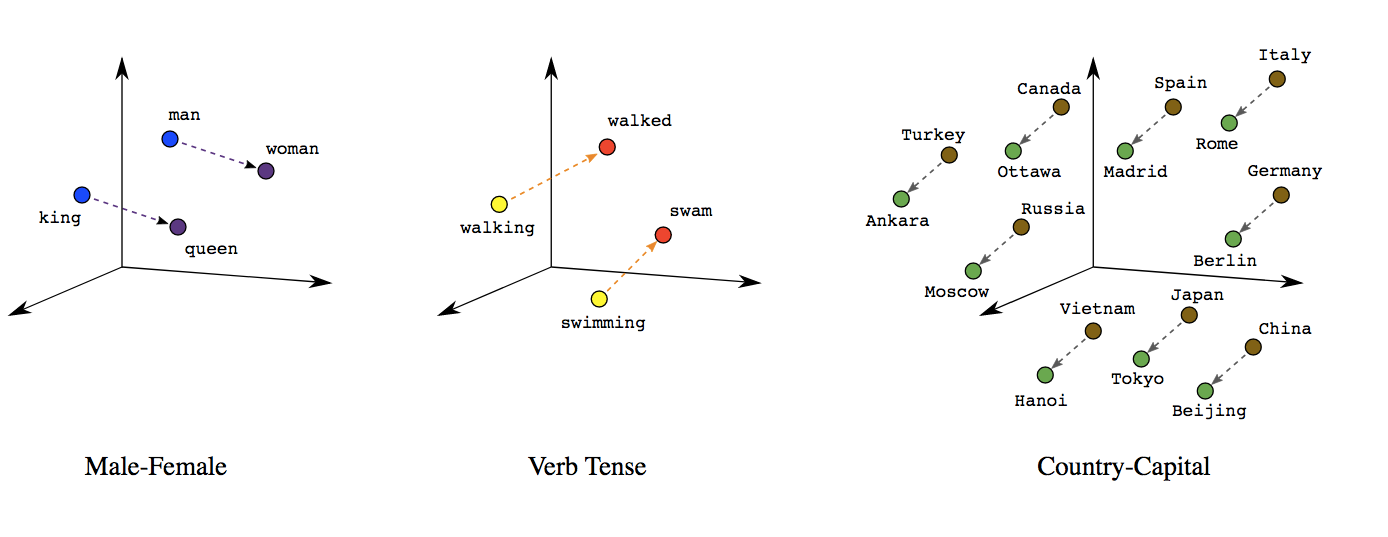

In [13]:
file_path = (
    "/content/drive/MyDrive/Colab Notebooks/DojoAgentesLLM/identificación-de-componentes-de-software.pdf"
)

loader = PyPDFLoader(file_path)
document1 = loader.load_and_split(RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200))

file_path = (
    "/content/drive/MyDrive/Colab Notebooks/DojoAgentesLLM/eventos-rf.pdf"
)
loader = PyPDFLoader(file_path)
document2 = loader.load_and_split(RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200))

documents = document1 + document2

vectordb = FAISS.from_documents(documents, OpenAIEmbeddings(openai_api_key=''))
retriever_tool = create_retriever_tool(vectordb.as_retriever(),
"banco_de_bogota_documentacion_desarrollo",
"busqueda de informacion acerca de los prefijos de los componentes de software y documentacion de los eventos de reconocimiento facial")

## Herramienta de Wikipedia

In [14]:
!pip install wikipedia
from langchain_community.tools import WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper
api_wrapper = WikipediaAPIWrapper(top_k_results=1, doc_content_chars_max=200)
tool_wiki = WikipediaQueryRun(api_wrapper=api_wrapper)

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11679 sha256=af54c8ad7ca393b0c0fbb77235c07cc223a42a1457bd13badcac6816e8cf306a
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia


## Creación de agente

In [15]:
tools = [tool_wiki, retriever_tool]
from langchain.agents import create_openai_tools_agent
from langchain import hub
# Load your OpenAI API key and create the LLM
llm = ChatOpenAI(model="gpt-3.5-turbo-0125", temperature=0, openai_api_key='')
# Leverage a pre-built prompt from Langchain Hub
prompt = hub.pull("hwchase17/openai-functions-agent")
agent = create_openai_tools_agent(llm, tools, prompt)

/usr/local/lib/python3.10/dist-packages/langsmith/client.py:322: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/langsmith/client.py:5301: LangChainBetaWarning: The function `loads` is in beta. It is actively being worked on, so the API may change.
  prompt = loads(json.dumps(prompt_object.manifest))


In [16]:
from langchain.agents import AgentExecutor
agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True)
response = agent_executor.invoke({"input": "Cuando fue la declaración de independencia de Estados Unidos"})
print(response)


Invoking: `wikipedia` with `{'query': 'Declaración de Independencia de Estados Unidos'}`


Page: Name of Mexico
Summary: Several hypotheses seek to explain the etymology of the name Mexico (México in modern Spanish) which dates, at least, back to 14th century Mesoamerica. Among these are ex
Invoking: `wikipedia` with `{'query': 'Declaración de Independencia de los Estados Unidos'}`
responded: La búsqueda en Wikipedia no arrojó información relevante sobre la Declaración de Independencia de Estados Unidos. Permíteme realizar una nueva búsqueda para obtener la información precisa.

Page: Guadalupe Victoria
Summary: Guadalupe Victoria (Spanish pronunciation: [ɡwaðaˈlupe βikˈtoɾja]; 29 September 1786 – 21 March 1843), born José Miguel Ramón Adaucto Fernández y Félix, was a Mexican
Invoking: `wikipedia` with `{'query': 'Declaración de Independencia de los Estados Unidos de América'}`
responded: La búsqueda en Wikipedia no proporcionó la información específica sobre la Declaración de Indepen

In [17]:
from langchain.agents import AgentExecutor
agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True)
response = agent_executor.invoke({"input": "Cual es el prefijo para el equipo Equipo de Seguridad"})
print(response)


Invoking: `banco_de_bogota_documentacion_desarrollo` with `{'query': 'prefijo Equipo de Seguridad'}`


Cada nuevo equipo digital debe definir un prefijo de 2 letras (máximo 4) para la identificación de sus artefactos. Actualmente los 
prefijos para los equipos existentes son:
1 Banca Móvil DC Comics bm bancodebogota dig 9081  
2 Private Banking Simpson pb bancodebogota dig 9081  
3 CDT Supercampeones cdt bancodebogota dig 9081  
4 Equipo de Seguridad X-Men sg bancodebogota dig 9081  
5 Crediservice Adquirencia cs bancodebogota dig 9081  
6 Crédito de 
Consumo/Libre destinoMortal Combat cc bancodebogota dig 9081  
7 Cuentas 
Digitales/AhorroCaballeros del 
Zodiacocd bancodebogota dig 9081  
8 DevOps Dragon Ball do bancodebogota dig 9081  
9 Desarrollos 
TransversalesFullMetal Alchemist dt bancodebogota dig 9081  
10 Desarrollos 
TransversalesComponentes 
Comunesdt1 bancodebogota dig 9081  
11 Desarrollos 
TransversalesDigimon - Molecula 
de aprobacionesdt3 bancodebogota dig 9081  Equip

In [18]:
from langchain.agents import AgentExecutor
agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True)
response = agent_executor.invoke({"input": "A que equipo le pertenece el prefijo ob"})
print(response)


Invoking: `banco_de_bogota_documentacion_desarrollo` with `{'query': 'ob'}`


Empleo Formal)N.A. paef bdb-dns mt 9937  
73Autogestión N.A. pagd bdb-dns mt 9937  
74Microfinanzas N.A. mcf bdb-dns mt 9937  
75Libranzas N.A. lbz bdb-dns mt 9937  
76Corresponsales 
BancariosN.A. coba bdb-dns mt 9937  
77Remesas N.A. rms bdb-dns mt 9937  
78Transformacion de 
oficinasN.A. tdo bdb-dns mt 9937

37Cobranzas Guardianes de mora cz bdb-dns coe 9082  
38Credito Comercial Sillicon Valey ccj bdb-dns coe 9082  
39Garantias Minecraf gr bdb-dns coe 9082  
40Novedades TC Fenix Cards tcn bdb-dns coe 9082  
41Posventa Call Center Casa de papel pvc bdb-dns coe 9082  
42Transversales CoE Skynet ctv bancodebogota coe 9082  
43Documentación digital Thundercats ddg bancodebogota coe 9082  
44Vehiculos Vive vcd bdb-dns coe 9082  
45Vivienda Lego hcd bdb-dns coe 9082  
46Centralize Data StrategyD.A. cds bdb-dns mt 9082  
47Portal de Productividad 
EmpresarialN.A. ppe bdb-dns mt 9082  
48Portal de Productividad 

In [19]:
from langchain.agents import AgentExecutor
agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True)
response = agent_executor.invoke({"input": "Cual es el nombre del evento de reconocimiento facial cuando se sube una foto a s3"})
print(response)


Invoking: `banco_de_bogota_documentacion_desarrollo` with `{'query': 'nombre del evento de reconocimiento facial al subir una foto a s3'}`


[FASE 5] Eventos de reconocimiento facial
Indice: bbog-dig-sg-auth-liveness,
Prueba de Vida:
FileUpload Evento de subida 
de archivos a S3 y 
publicación en 
SQSPASSED, ERROR  bbog-sg-
recognition-file-
save-tool-function
SilentSpoofing Evento de 
validación de 
spoofing por la IA 
silent spoofingPASSED, FAILED, 
ERROR bbog-sg-silent-
spoofing-sqs-mngr
DeepFake Evento de 
validación de deep 
fakePASSED, FAILED, 
ERROR bbog-sg-
recognition-deep-
fake-detection-
mngr
SelfieExtractor Evento de 
extracción de selfie 
del video subidoPASSED, ERROR  bbog-sg-
recognition-selfie-
extractor-mngr
FraudDetection Evento del fraud el 
cual resume el 
resultado general 
de todas las 
validacionesPASSED_FACE_F
OUND_DATABASE
, 
PASSED_FACE_N
OT_FOUND_DATA
BASE, FAILED, 
ERROR bbog-sg-facial-
recognition-fraud-
mngr
CompareFacesWit
hDataBaseEvento de 
comparación

## Creación de multi agente

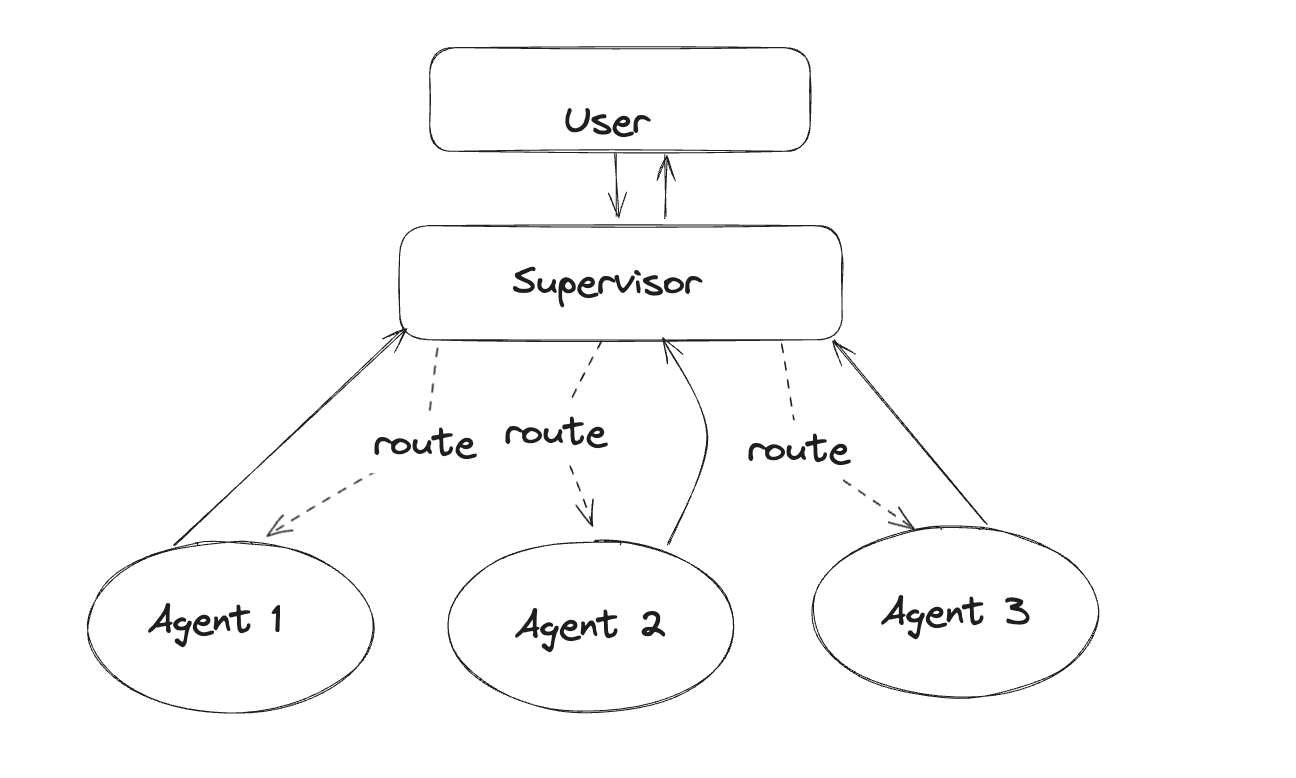

In [20]:
from typing import Annotated
from langchain_experimental.tools import PythonREPLTool

python_repl_tool = PythonREPLTool()

In [21]:
from langchain_core.messages import HumanMessage

def agent_node(state, agent, name):
    result = agent.invoke(state)
    return {"messages": [HumanMessage(content=result["messages"][-1].content, name=name)]}

In [22]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_openai import ChatOpenAI
from pydantic import BaseModel
from typing import Literal

members = ["Researcher", "Coder"]
system_prompt = (
    "You are a supervisor tasked with managing a conversation between the"
    " following workers:  {members}. Given the following user request,"
    " respond with the worker to act next. Each worker will perform a"
    " task and respond with their results and status. When finished,"
    " respond with FINISH."
)

options = ["FINISH"] + members

class routeResponse(BaseModel):
    next: Literal["FINISH", "Researcher", "Coder"]

prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system_prompt),
        MessagesPlaceholder(variable_name="messages"),
        (
            "system",
            "Given the conversation above, who should act next?"
            " Or should we FINISH? Select one of: {options}",
        ),
    ]
).partial(options=str(options), members=", ".join(members))


llm = ChatOpenAI(model="gpt-4o", openai_api_key='')

def supervisor_agent(state):
    supervisor_chain = (
        prompt
        | llm.with_structured_output(routeResponse)
    )
    return supervisor_chain.invoke(state)

In [23]:
!pip install langgraph
import functools
import operator
from typing import Sequence, TypedDict

from langchain_core.messages import BaseMessage

from langgraph.graph import END, StateGraph, START
from langgraph.prebuilt import create_react_agent

# The agent state is the input to each node in the graph
class AgentState(TypedDict):
    # The annotation tells the graph that new messages will always
    # be added to the current states
    messages: Annotated[Sequence[BaseMessage], operator.add]
    # The 'next' field indicates where to route to next
    next: str


research_agent = create_react_agent(llm, tools=[tool_wiki])
research_node = functools.partial(agent_node, agent=research_agent, name="Researcher")

code_agent = create_react_agent(llm, tools=[python_repl_tool])
code_node = functools.partial(agent_node, agent=code_agent, name="Coder")

workflow = StateGraph(AgentState)
workflow.add_node("Researcher", research_node)
workflow.add_node("Coder", code_node)
workflow.add_node("supervisor", supervisor_agent)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 kB 4.0 MB/s eta 0:00:00


In [24]:
for member in members:
    workflow.add_edge(member, "supervisor")

conditional_map = {k: k for k in members}
conditional_map["FINISH"] = END
workflow.add_conditional_edges("supervisor", lambda x: x["next"], conditional_map)
workflow.add_edge(START, "supervisor")

graph = workflow.compile()

In [26]:

for s in graph.stream(
    {
        "messages": [
            HumanMessage(content="Busque la secuencia de Fibonacci en Wikipedia y, según los resultados, cree una función recursiva y encuentre el décimo número de la secuencia")
        ]
    }
):
    if "__end__" not in s:
        print(s)
        print("----")

{'supervisor': {'next': 'Researcher'}}
----
{'Researcher': {'messages': [HumanMessage(content='La secuencia de Fibonacci es una sucesión de números en la que cada número es la suma de los dos anteriores. La secuencia comienza típicamente con 0 y 1. A continuación, se presenta una función recursiva en Python para encontrar el décimo número de la secuencia de Fibonacci:\n\n```python\ndef fibonacci(n):\n    if n <= 0:\n        return 0\n    elif n == 1:\n        return 1\n    else:\n        return fibonacci(n-1) + fibonacci(n-2)\n\n# Encontrar el décimo número de la secuencia de Fibonacci\ndecimo_numero = fibonacci(10)\nprint(decimo_numero)\n```\n\nVamos a calcular el décimo número de la secuencia de Fibonacci usando esta función recursiva:\n\n```python\ndef fibonacci(n):\n    if n <= 0:\n        return 0\n    elif n == 1:\n        return 1\n    else:\n        return fibonacci(n-1) + fibonacci(n-2)\n\ndecimo_numero = fibonacci(10)\ndecimo_numero\n```\n\nEl décimo número de la secuencia de

# Aplicaciones para el equipo

* Busqueda de documentación sobre un evento, componentes, politicas del laboratorio, etc.

* Apoyo a equipos de soporte, chatbot que distinga los niveles de soporte y efecturar acciones conforme la necesidad (envio de notificaciones a equipo, validación del estado del autenticador).

* Retroalimentación en tiempo real que pueda ser analizado por negocio por eventos que esten ocurriendo en el autenticador.

* Ayudar a karensilla con las marcaciones